In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
plt.rcParams.update({'font.size': 14})
from scipy import signal # some signals
import IPython.display as ipd # to play signals
import sounddevice as sd
import soundfile as sf

# Produto interno (Inner product / dot product)
Neste notebook vamos discutir a noção da operação chamda de produto interno. Esta é uma importante tecnologia matemática, que usamos muito em processamento de sinais. 

Considere dois vetores $\vec{a}$ e $\vec{b}$, por hora reais e bi-dimensionais. Portanto, podemos dizer que: 

\begin{equation}
\vec{a} \in \mathbb{R}^2
\end{equation}
e 

\begin{equation}
\vec{b} \in \mathbb{R}^2
\end{equation}

O produto interno entre $\vec{a}$ e $\vec{b}$ é

\begin{equation}
\vec{a} \cdot \vec{b} = \left\|\vec{a}\right\|  \left\|\vec{b}\right\| \cos{\theta} \ \ \in \mathbb{R}
\end{equation}
em que $\theta$ é o ângulo entre os vetores. Escrito de outra forma:

\begin{equation}
\vec{a} \cdot \frac{\vec{b}}{\left\|\vec{b}\right\|} = \left\|\vec{a}\right\| \ \cos{\theta}
\end{equation}

Note então que o produto interno entre $\vec{a}$ e o vetor unitário $\frac{\vec{b}}{\left\|\vec{b}\right\|}$ mensura o **tamanho da projeção de** $\vec{a}$ **na direção de** $\vec{b}$. 

Vamos ver um exemplo gráfico.

Dot product is: -50.000000
Angle between vectors is: 180.000000 deg


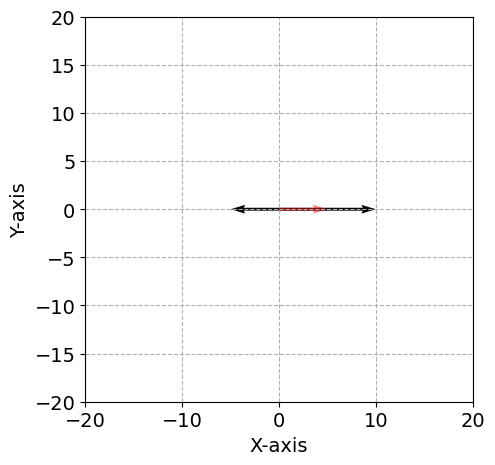

In [9]:
# 2D Vectors
a = np.array([5, 10])
b = np.array([13, 3])

a = np.array([0, 10])
b = np.array([10, 0])

a = np.array([10, 0])
b = np.array([-5, 0])


# Lengths
a_norm = np.linalg.norm(a)
b_norm = np.linalg.norm(b)

# dot product
dot_prod = np.dot(a, b)

# angle
theta = np.arccos(dot_prod/(a_norm*b_norm))

# projection in b direction
proj = b*np.cos(theta)

# print info
print("Dot product is: {:.6f}".format(dot_prod))
print("Angle between vectors is: {:.6f} deg".format(np.rad2deg(theta)))

# plot
plt.figure(figsize = (5,5))
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='k')
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='k')
plt.quiver(0, 0, proj[0], proj[1], angles='xy', scale_units='xy', scale=1, color='r', alpha = 0.5)
plt.xlim((-20, 20))
plt.ylim((-20, 20))
# Add grid and labels
plt.grid(linestyle = '--')
plt.xlabel('X-axis')
plt.ylabel('Y-axis');

### Casos especiais

Do exemplo anterior, se  $\vec{a}$ e $\vec{b}$ estiverem na mesma direção:

\begin{equation}
\vec{a} \cdot \vec{b} = \pm\left\|\vec{a}\right\|  \left\|\vec{b}\right\| 
\end{equation}
já que $\theta = 0$ e $\cos(\theta) = \pm1$.

se  $\vec{a}$ e $\vec{b}$ forem **ortogonais**

\begin{equation}
\vec{a} \cdot \vec{b} = 0
\end{equation}
já que $\theta = 90$ e $\cos(\theta) = 0$.

# Por que este raciocínio de projeção é útil?

Porque você pode quebrar seu vetor em componentes mais simples. De fato, um vetor 2D pode ser quebrado em vetores unitários $\hat{x} = (1,0)$ e $\hat{y} = (0,1)$, que são entre si **ortogonais**. Portanto, formam uma boa base vetorial pra representar vetores 2D. 

C:\Users\Win11\anaconda3\Lib\site-packages\matplotlib\quiver.py:602: RuntimeWarning: invalid value encountered in divide
  lengths = np.hypot(*dxy.T) / eps


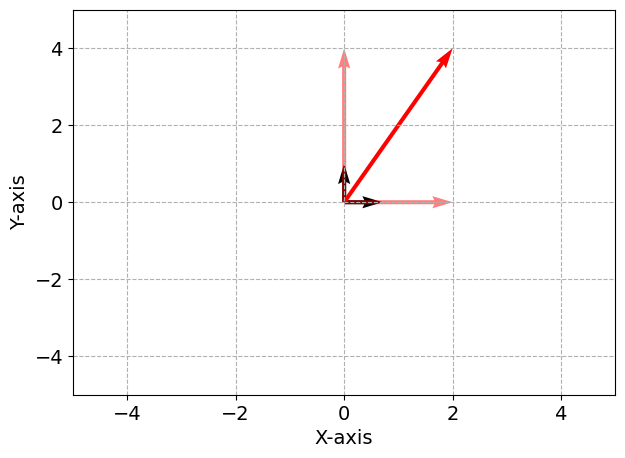

In [14]:
hat_x = np.array([1, 0])
hat_y = np.array([0, 1])

# 2D Vectors
a = np.array([2, 4])
a_proj_x = hat_x * np.dot(a,hat_x)
a_proj_y = hat_y * np.dot(a,hat_y)

# plot
plt.figure(figsize = (7,5))
plt.quiver(0, 0, hat_x[0], hat_x[1], angles='xy', scale_units='y', scale=1, color='k')
plt.quiver(0, 0, hat_y[0], hat_y[1], angles='xy', scale_units='xy', scale=1, color='k')
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='r', alpha = 1)
plt.quiver(0, 0, a_proj_x[0], a_proj_x[1], angles='xy', scale_units='xy', scale=1, color='r', alpha = 0.5)
plt.quiver(0, 0, a_proj_y[0], a_proj_y[1], angles='xy', scale_units='xy', scale=1, color='r', alpha = 0.5)
plt.xlim((-5, 5))
plt.ylim((-5, 5))
# Add grid and labels
plt.grid(linestyle = '--')
plt.xlabel('X-axis')
plt.ylabel('Y-axis');

# Computação discreta

O produto interno pode também ser computado da seguinte forma

\begin{equation}
\vec{a} \cdot \vec{b} = a_1 * b_1 + a_2*b_2
\end{equation}
em que $\vec{a} = (a_1, a_2)$ e $\vec{b} = (b_1, b_2)$.

In [16]:
# 2D Vectors
a = np.array([5, 10])
b = np.array([13, 3])
# dot product - 1rst way
dot_prod1 = np.dot(a, b)
# dot product - 2nd way
dot_prod2 = a[0]*b[0] + a[1]*b[1]

print("Dot product (way 1) is: {:.6f}".format(dot_prod1))
print("Dot product (way 2) is: {:.6f}".format(dot_prod2))

Dot product (way 1) is: 95.000000
Dot product (way 2) is: 95.000000


# Norma Euclidiana

O quadrado da norma Euclidiana (ou norma $\mathcal{\ell}_2$) é

\begin{equation}
\left\|\vec{a}\right\|_2^2 = \vec{a} \cdot \vec{a} = \sum\limits_{i = 0}^{2} a_{i}^{2}
\end{equation}

In [22]:
# 2D Vectors
a = np.array([5, 10])
# Lengths
a_norm1 = np.linalg.norm(a)

a_norm2 = np.dot(a,a)
print("L2 norm (way 1) is: {:.12f}".format(a_norm1))
print("L2 norm (way 2) is: {:.12f}".format(np.sqrt(a_norm2)))

L2 norm (way 1) is: 11.180339887499
L2 norm (way 2) is: 11.180339887499


# Múltiplas dimensões

Nós podemos estender o mesmo raciocínio à múltiplas dimensões. Considere os vetores de $N$ dimensões

\begin{equation}
\textbf{a} \in \mathbb{R}^N
\end{equation}
e 

\begin{equation}
\textbf{b} \in \mathbb{R}^N
\end{equation}

Note que eu não escrevi $\vec{a}$, mas sim $\textbf{a}$ (que é uma notação mais comum). Usualmente, nossa convenção é que $\textbf{a}$ e $\textbf{b}$ são vetores colunas (números empilhados na vertical).

Fica muito difícil plotar tais vetores num sistema de coordenadas multi-dimensionais (vamos ter que inventar outro jeito). Mas nada impede de definir as mesmas operações. O produto interno é

\begin{equation}
\textbf{a} \cdot \textbf{b} = \sum\limits_{i = 1}^{N} a_i \ b_i
\end{equation}
e continua sendo uma métrica do tamanho da projeção de $\textbf{a}$ na direção de $\textbf{b}$. 

Outra forma de ver esta operação é matricialmente como

\begin{equation}
\textbf{a} \cdot \textbf{b} = \textbf{a}^{T} \ \textbf{b}
\end{equation}

O quadrado da norma Euclidiana de um vetor em $\mathbb{R}^N$ é

\begin{equation}
\textbf{a} \cdot \textbf{a} = \textbf{a}^{T} \ \textbf{a} = \sum\limits_{i = 1}^{N} a_i^2
\end{equation}

### Mas por que isto é útil?

Em uma primeira análise o que vamos fazer é pensar que um sinal no tempo pode ser composto de uma série de amostras. Assim, se o sinal tem $N$ amostras, ele é uma **coleção de números**, empilhados verticalmente e, portanto **é um vetor** $\in \ \mathbb{R}^N$. 

Por exemplo, considere a versão discretizada de 

\begin{equation}
x(t) = \cos(2 \pi f_0 t)
\end{equation}
com $f = 1$ Hz, e $t$ discretizado de forma que 

\begin{equation}
\textbf{t} = [0.00, 0.01, 0.02, \cdots, 0.99]^T
\end{equation}

Assim, a versão discretizada de $x(t)$ é

\begin{equation}
\textbf{x} = [\cos(2 \pi f_0 0.00), \ \cos(2 \pi f_0 0.01), \ \cos(2 \pi f_0 0.02), \ \cdots, \cos(2 \pi f_0 0.99)]^T
\end{equation}

In [199]:
t = np.arange(start = 0, stop = 1, step = 0.01)
print("time vector {}".format(t))

time vector [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [213]:
f_0 = 1
x = np.cos(2*np.pi*f_0*t)
print("signal vector {}".format(np.round(x,4)))

signal vector [ 1.      0.998   0.9921  0.9823  0.9686  0.9511  0.9298  0.9048  0.8763
  0.8443  0.809   0.7705  0.729   0.6845  0.6374  0.5878  0.5358  0.4818
  0.4258  0.3681  0.309   0.2487  0.1874  0.1253  0.0628  0.     -0.0628
 -0.1253 -0.1874 -0.2487 -0.309  -0.3681 -0.4258 -0.4818 -0.5358 -0.5878
 -0.6374 -0.6845 -0.729  -0.7705 -0.809  -0.8443 -0.8763 -0.9048 -0.9298
 -0.9511 -0.9686 -0.9823 -0.9921 -0.998  -1.     -0.998  -0.9921 -0.9823
 -0.9686 -0.9511 -0.9298 -0.9048 -0.8763 -0.8443 -0.809  -0.7705 -0.729
 -0.6845 -0.6374 -0.5878 -0.5358 -0.4818 -0.4258 -0.3681 -0.309  -0.2487
 -0.1874 -0.1253 -0.0628 -0.      0.0628  0.1253  0.1874  0.2487  0.309
  0.3681  0.4258  0.4818  0.5358  0.5878  0.6374  0.6845  0.729   0.7705
  0.809   0.8443  0.8763  0.9048  0.9298  0.9511  0.9686  0.9823  0.9921
  0.998 ]


# Como plotar?

É fácil - num gráfico com $\textbf{t}$ no eixo $x$ vs. $\textbf{x}$ no eixo $y$ 

- Usando "plot" a figura parece contínua, mas não é. Os eixos $t$ e $x(t)$ foram discretizados.
- Talvez, uma representação mais fidedigna seja usando "stem"

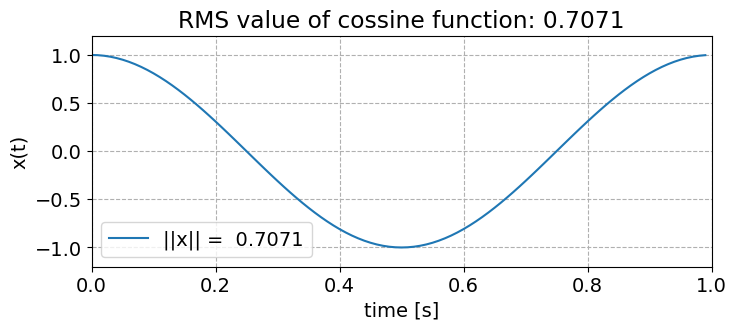

In [250]:
plt.figure(figsize = (8,3))
plt.title("RMS value of cossine function: {:.4f}".format(np.sqrt(2)/2))
plt.plot(t, x, label = r"||x|| =  {:.4f}".format(np.sqrt(np.dot(x,x)/len(x))))
plt.legend()
plt.xlim((0, 1))
plt.ylim((-1.2, 1.2))
plt.grid(linestyle = '--')
plt.xlabel('time [s]')
plt.ylabel('x(t)');

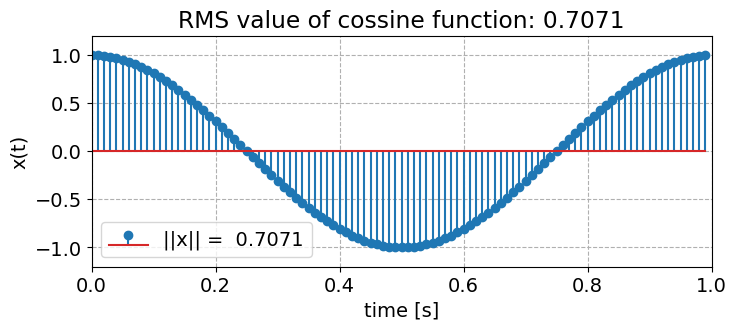

In [254]:
plt.figure(figsize = (8,3))
plt.title("RMS value of cossine function: {:.4f}".format(np.sqrt(2)/2))
plt.stem(t, x, label = r"||x|| =  {:.4f}".format(np.sqrt(np.dot(x,x)/len(x))))
plt.legend()
plt.xlim((0, 1))
plt.ylim((-1.2, 1.2))
plt.grid(linestyle = '--')
plt.xlabel('time [s]')
plt.ylabel('x(t)');

# Uma nota sobre vetores complexos

Vetores complexos vão aparecer com frequência nos nossos estudos. Se aplicarmos a definição anterior $\textbf{a} \cdot \textbf{b} = \textbf{a}^{T} \ \textbf{b}$ veremos que ela não faz sentido. Considere, por exemplo a norma do vetor $\textbf{a} = [1, \text{j}]$. Usando a definição antiga, teríamos

\begin{equation}
\textbf{a} \cdot \textbf{a} = \textbf{a}^{T} \ \textbf{a} = 1 * 1 + \text{j} * \text{j}  = 0
\end{equation}

Um ajuste é necessário, e ele se aplica a todos os casos anteriormente estudados.

\begin{equation}
\textbf{a} \cdot \textbf{b} = \textbf{b}^{H} \ \textbf{a}
\end{equation}
em que $\textbf{a}^{H}$ é o vetor **Hermitiano** (**conjugado** \& **transposto** - ao invés de apenas transposto). Neste caso, a norma Euclidiana fica

\begin{equation}
    \textbf{a} \cdot \textbf{a} = \textbf{a}^{H} \ \textbf{a} = \sum\limits_{i = 1}^{N}a_{i}^{*}a_{i} = \sum\limits_{i = 1}^{N} |a_{i}|^2
\end{equation}

O que faz total sendido. No caso do exemplo anterior: 

\begin{equation}
    \textbf{a} \cdot \textbf{a} = \textbf{a}^{H} \ \textbf{a} = \sum\limits_{i = 1}^{N}a_{i}^{*}a_{i} = 1*1 + -\text{j} * \text{j} = 2
\end{equation}

E a definição do produto interno agora se aplica ao cálculo da Norma Euclidiana de números complexos (em outras palavras - sua **magnitude**).

# Funções contínuas

Ora, nós podemos estender o raciocínio à funções contínuas. Neste caso, o produto interno é definido como

\begin{equation}
    <f(t), g(t)> \ =  \int\limits_{t_1}^{t_2} f(t) g^{*}(t) \text{d}t
\end{equation}

E o produto interno entre as funções pode ser visto como o **tamanho da projeção** de $f(t)$ em $g(t)$.

E o quadrado da norma $\mathcal{\ell}_2$ de uma função é

\begin{equation}
    \left\|<f(t), f(t)>\right\|_2^2 \ =  \int\limits_{t_1}^{t_2} f(t) f^{*}(t) \text{d}t = \int\limits_{t_1}^{t_2} |f(t)|^{2} \text{d}t
\end{equation}
E como vimos a norma tem a ver com a energia da função (RMS).

#### De posse deste raciocínio, nós podemos pensar no seguinte: 

Se $f(t)$ for um sinal qualquer, eu posso tentar calcular o tamanho da projeção deste na "direção" de um sinal básico escolhido. 

Adivinha só o que faz a **Transformada de Fourier**. Exatamente isso, escolhendo as funções $\sin(\omega t)$ e $\cos(\omega t)$ como bases ortogonais. 

Vamos ver alguns exemplos (com versões discretizadas).

### 1) Seno e cosseno são mesmo ortogonais?

In [36]:
# time
t = np.arange(start = 0, stop = 1, step = 0.01)
# cosine
f_cos = 1
g_cos = np.cos(2*np.pi*f_cos*t)

# sine
f_sin = 12
g_sin = np.sin(2*np.pi*f_cos*t)

dot_prod = np.dot(g_cos, g_sin)

print("Dot product between cos of freq {} Hz and sin of freq {} Hz is: {:.19f}".format(f_cos, f_sin, dot_prod))

Dot product between cos of freq 1 Hz and sin of freq 12 Hz is: -0.0000000000000000278


### 2) Cossenos de frequências diferentes são ortogonais ou estão na mesma direção?

Aqui temos um pequeno truque importante. Os sinais são finitos (o que impacta no cálculo computacional), enquanto as funções são infinitas. Portanto, o resultado analítico difere do computacional dependendo da duração do sinal. Vamos nos ater a múltiplos inteiros de 1.0 Hz, que ilustram o ponto de que cossenos de frequência diferentes são funções ortogonais.

In [48]:
# time
t = np.arange(start = 0, stop = 1, step = 0.01)
# cosine 1
f_cos1 = 1
g_cos1 = np.cos(2*np.pi*f_cos1*t)

# cosine 2
f_cos2 = 1
g_cos2 = np.cos(2*np.pi*f_cos2*t)

dot_prod = np.dot(g_cos1, g_cos2)

print("Dot product between cos of freq {} Hz and cos of freq {} Hz is: {:.6f}".format(f_cos1, f_cos2, dot_prod))

Dot product between cos of freq 1 Hz and cos of freq 1.23 Hz is: -0.000000


### 3) Vamos tentar um cálculo simples numa função mais complicada.

Um sinal tipo onda quadrada

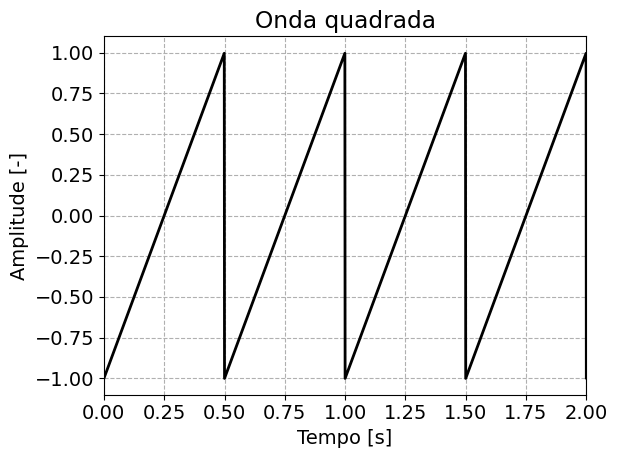

In [60]:
t = np.arange(start = 0, stop = 100, step = 0.001) # vetor temporal
f1 = 2 # Frequencia fundamental
# onda quadrada
#x = signal.square(2 * np.pi * f1 * t)
# sawtooth
x = signal.sawtooth(2 * np.pi * f1 * t, width=1)

# Figura
plt.figure()
plt.title('Onda quadrada')
plt.plot(t, x, '-k', linewidth = 2, label = 'sinal original')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, 2))
plt.tight_layout()
plt.show()

In [74]:
###### cosine 1
freq = 8
g_cos = np.cos(2*np.pi*freq*t)
g_sin = np.sin(2*np.pi*freq*t)

dot_prod_cos = np.dot(x, g_cos)
dot_prod_sin = np.dot(x, g_sin)

print("freq is {} Hz".format(freq))
print("Dot product between cos and signal: {:.4f}".format(dot_prod_cos/len(x)))
print("Dot product between sin and signal: {:.4f}".format(dot_prod_sin/len(x)))

freq is 8 Hz
Dot product between cos and signal: -0.0002
Dot product between sin and signal: -0.0796
